# Regression and its evaluation assignment

Q1 what is simple linear regression?

ans- Simple linear regression is a method to predict the value of one variable (the dependent varable or response) baased on the value of one another variable by fitting a straight line through the data points

Equation:- for straight line

Y = β∘ + β1X + 𝛆

Y = dependent variable

X = Independent variable

β𝟎 =intercept

β1 = slope

𝜺 =error term

The goal is to find the line of best fit which manimise the total squared differences between the actual values and predicted values

examples predicting someones weight (Y) based on their heighrt(X)



Q2  what are the key assumptions of simple linear  regression?

ans- 1. Linearity: the relationship between the independent variable X andY is linear that is the change  inY is propotional to change in X

2. Independence of errors : the residuals are independent there should be no correlation betweem consecutive residuals

3. Homoscedasticity : the variance of residuals should be constant across all levels of X

4. Normality of errors:  The residuals  should be normally distributed around the regression line

5.O significant outliers or high leverage points: Outliers can overly influence the slope and interscept

Q3 What is heteroscedasticity and why is it important to address in regression models?

ans: Heteroscedasicity means that the variance of the residuals is not constant across all levels of the independent variables

* with  homoscedasiticity the soread of the residuals is even the scatter around the regression line stays roughly the same for all predicted  values

* with heteroscedasticity the spread changes often getting wider or narrower as the value of X changes

Examples:

* For people with low years of education the variance in income is small

* for people with higher eduaction incomes can vary widely .This creates fan shape in residual plot

Q4 what is multiple linear regression ?

ans:Multiple linear regression is an extension of simple linear regression but instead of using one independent of using one indepemdent variiable predictor  it uses two or more

equation:Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

multiple linear regression lets you:

* predict Y using several factors at once

* understand the effect of each predictor while controlling for others

* estimate how much each X uniquley contributes to Y

* Real wprld problems are rarely explaind by one factor

* MLR allows for better predictions

* It helps understand the rekative importance of each predictor

         

Q5  what is polynomial regression and how does it didffer  from linear regression?

ans: polynomial regression is an extension of linear regression that models the relationship between the independent variables and the dependent variable as an nth degreee polynimial

 Y = β₀ + β₁X + β₂X² + ... + βₙXⁿ + ε

 * even though the relationship nids non linear inX polynomial regression is still  linear in the coefficients thats why it can be solved using ordinary least  squares just like linear regresion

 when to use polynimial regression

 * growth curves

 * price vs advertising spend

 * Physics or engineering problems where relationship bend

Q6 Implement a python program to fit a simple linear regression mpodel to the following sample data
x = [ 1,2,3,4,5]

y = [2.1,4.3,6.1,7.9,10.2]

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(x, y)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 0.17999999999999794
Coefficients: [1.98]


Q7fit a multiple linear regression model on this ample data

* area=[1200,1500,1800,2000]

* rooms=[2,3,3,4]

* price = [250000,300000,320000,370000]

check for multicollinearity using VIF and report the results

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = {'area': [1200, 1500, 1800, 2000],
        'rooms': [2, 3, 3, 4],
        'price': [250000, 300000, 320000, 370000]}

df = pd.DataFrame(data)

X = df[['area', 'rooms']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVIF:")
print(vif_data)

Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

VIF:
  feature         VIF
0    area  127.796923
1   rooms  127.796923


Q8 implement polynomial regression on the following data

* X=[1,2,3,45]

y = [2.2,4.8,7.5,11.2,14.7]

fit a 2nd degree polynomial and plot the resulting curve

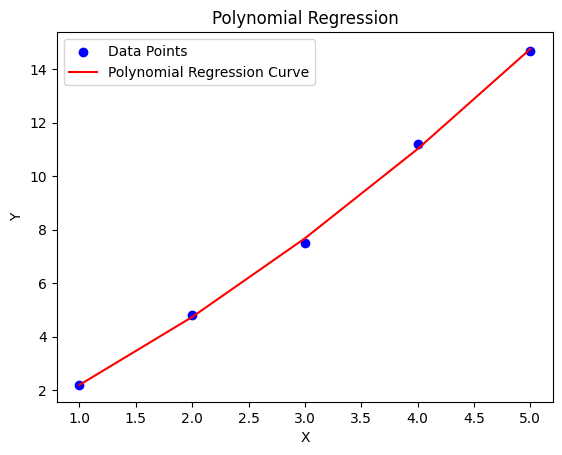

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, model.predict(x_poly), color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Q9  create a residuals plot for a regression model trained on this data

x= [10,20,30,40,50]

y= [15,35,40,50,65]

asses heteroscedasicity by examing the spred of residuals

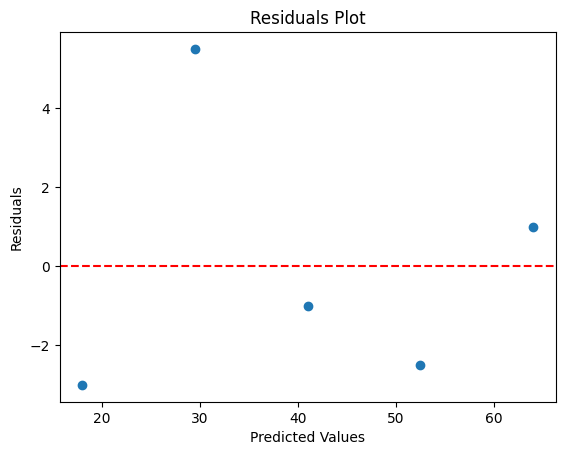

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(x, y)

predictions = model.predict(x)
residuals = y - predictions

plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

Q10 imagine you are data scientist working for areal estate comapny you need to predict house price using features like area, number of rooms, and loaction however you detct heteroscedasticity and multicollinearti  in your regression model expalin the steps you would take to addres these issues and ensure a robust

ans:  goal : to predicct house prices using features like area , number of rooms and location

**how to address heteroscedasticity**

why its a problem:

* heteroscedasity dosent bias coefficients but it amkes standard errors unreliable

solutions:

* transform the dependent variable :- Take the log of houses prices this often stabilizes variance

* use robust standard errors :- instead of changing the model, adjust the calculation of standard errors to be robust to heteroscedasticity

* weighted least squares:- give less weight to observations with higher variance
:- sometimes hetersscedasticity apperas beacuse important predictors are missing

**How to address multicollinearity**

 why its problem:

 *  high correlation among predictors inflates standard errors

 solutions:

 * check VIF:- drop or combine preditors with high VIf

 * Use dimensionality reduction:- combine corelated variables into uncorrelated components

 * Regularisation:- Use ridge regression to shrink coeeficients to correlated predicators or lasso regression to shrink some coefficients to zero

  **model diagnostics and validation**


 * recheck residual plots to confirm variance is more stable

 * recalculate vif to verify multicollinearity is under control

 * use cross validation to check generalization

 * compare model performance

  **final deliverable**

  * communicate the impact of each preictor

  * explain any trasformation used

  * justify any features dropped or combined

